# Assignment 5

Build the best fitting auto regression model for FTSE returns. You should also analyze residuals. 

### Importing  Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts 
import seaborn as sns

### Loading and Preprocessing  Data

In [2]:
raw_data = pd.read_csv("2018_financial_data.csv") 
df=raw_data.copy()
df['date'] = pd.to_datetime(df['date'], dayfirst = True)
df.set_index('date', inplace=True)
df=df.asfreq('b')
df=df.fillna(method='ffill')

In [3]:
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [4]:
def llrTest(model1,model2,df_difference=1):
    L1 = model1.fit().llf
    L2 = model2.fit().llf
    LR=(2*(L2-L1))
    p = chi2.sf(LR,df_difference)
    return p

## Dickey Fuller Test for FTSE ##

In [5]:
sts.adfuller(df['ftse'])

(-1.597778892117985,
 0.4847091205465968,
 6,
 6270,
 {'1%': -3.4313933778649943,
  '5%': -2.862001080749219,
  '10%': -2.567015430304048},
 68476.87620974617)

In [6]:
df['ftseReturns']=df['ftse'].pct_change(periods=1).mul(100)

In [7]:
df = df[1:]

In [8]:
#This is stantionary
sts.adfuller(df['ftseReturns'])

(-15.140761332034767,
 7.016338451094858e-28,
 34,
 6241,
 {'1%': -3.431398228116075,
  '5%': -2.8620032237533897,
  '10%': -2.5670165710764503},
 19026.504469066465)

## AR(1) Model for Returns ##

In [9]:
model_ftseReturns_ar_1 = ARMA(df['ftseReturns'], order=(1,0))

In [10]:
results_ftseReturns_ar_1 = model_ftseReturns_ar_1.fit()

In [11]:
results_ftseReturns_ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            ftseReturns   No. Observations:                 6276
Model:                     ARMA(1, 0)   Log Likelihood               -9597.705
Method:                       css-mle   S.D. of innovations              1.117
Date:                Thu, 16 Apr 2020   AIC                          19201.409
Time:                        13:02:09   BIC                          19221.643
Sample:                    01-10-1994   HQIC                         19208.420
                         - 01-29-2018                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0190      0.014      1.371      0.170      -0.008       0.046
ar.L1.ftseReturns    -0.0176      0.013     -1.394      0.163      -0.042       0.007
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -56.8440           +0.0000j           56.8440            0.5000
-----------------------------------------------------------------------------
"""

In [12]:
# Can not reject null hypthoses due to p-value

## AR(2) Model for Returns ##

In [13]:
model_ar_2 = ARMA(df['ftseReturns'],order=(2,0))
results_ar_2 = model_ar_2.fit()
results_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            ftseReturns   No. Observations:                 6276
Model:                     ARMA(2, 0)   Log Likelihood               -9590.309
Method:                       css-mle   S.D. of innovations              1.115
Date:                Thu, 16 Apr 2020   AIC                          19188.618
Time:                        13:02:09   BIC                          19215.596
Sample:                    01-10-1994   HQIC                         19197.966
                         - 01-29-2018                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0190      0.013      1.440      0.150      -0.007       0.045
ar.L1.ftseReturns    -0.0184      0.013     -1.463      0.143      -0.043       0.006
ar.L2.ftseReturns    -0.0485      0.013     -3.848      0.000      -0.073      -0.024
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.1901           -4.5361j            4.5401           -0.2567
AR.2           -0.1901           +4.5361j            4.5401            0.2567
-----------------------------------------------------------------------------
"""

In [14]:
results_ar_2.llf

-9590.30911343141

In [15]:
def llrTest(model1,model2,df_difference=1):
    L1 = model1.fit().llf
    L2 = model2.fit().llf
    LR=(2*(L2-L1))
    p = chi2.sf(LR,df_difference)
    return p

In [16]:
llrTest(model_ftseReturns_ar_1,model_ar_2)

0.00012009584210804937

## AR(3) Model for Returns ##

In [17]:
model_ar_3 = ARMA(df['ftseReturns'],order=(3,0))
results_ar_3 = model_ar_3.fit()
results_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            ftseReturns   No. Observations:                 6276
Model:                     ARMA(3, 0)   Log Likelihood               -9575.951
Method:                       css-mle   S.D. of innovations              1.113
Date:                Thu, 16 Apr 2020   AIC                          19161.902
Time:                        13:02:09   BIC                          19195.624
Sample:                    01-10-1994   HQIC                         19173.586
                         - 01-29-2018                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0190      0.012      1.542      0.123      -0.005       0.043
ar.L1.ftseReturns    -0.0217      0.013     -1.725      0.084      -0.046       0.003
ar.L2.ftseReturns    -0.0498      0.013     -3.956      0.000      -0.074      -0.025
ar.L3.ftseReturns    -0.0676      0.013     -5.365      0.000      -0.092      -0.043
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9712           -2.1405j            2.3505           -0.1822
AR.2            0.9712           +2.1405j            2.3505            0.1822
AR.3           -2.6790           -0.0000j            2.6790           -0.5000
-----------------------------------------------------------------------------
"""

In [18]:
llrTest(model_ar_2,model_ar_3,df_difference=1)

8.379280062837199e-08

## AR(4) Model for Returns ##

In [19]:
model_ar_4 = ARMA(df['ftseReturns'],order=(4,0))
results_ar_4 = model_ar_4.fit()
results_ar_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            ftseReturns   No. Observations:                 6276
Model:                     ARMA(4, 0)   Log Likelihood               -9573.016
Method:                       css-mle   S.D. of innovations              1.112
Date:                Thu, 16 Apr 2020   AIC                          19158.032
Time:                        13:02:10   BIC                          19198.499
Sample:                    01-10-1994   HQIC                         19172.053
                         - 01-29-2018                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0190      0.013      1.494      0.135      -0.006       0.044
ar.L1.ftseReturns    -0.0197      0.013     -1.558      0.119      -0.044       0.005
ar.L2.ftseReturns    -0.0482      0.013     -3.832      0.000      -0.073      -0.024
ar.L3.ftseReturns    -0.0669      0.013     -5.313      0.000      -0.092      -0.042
ar.L4.ftseReturns     0.0306      0.013      2.423      0.015       0.006       0.055
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.0764           -0.0000j            2.0764           -0.5000
AR.2            0.3947           -2.0922j            2.1291           -0.2203
AR.3            0.3947           +2.0922j            2.1291            0.2203
AR.4            3.4747           -0.0000j            3.4747           -0.0000
-----------------------------------------------------------------------------
"""

In [20]:
llrTest(model_ar_3,model_ar_4,df_difference=1)

0.015399594104025739

## AR(5) Model for Returns ##

In [21]:
model_ar_5 = ARMA(df['ftseReturns'],order=(5,0))
results_ar_5 = model_ar_5.fit()
results_ar_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            ftseReturns   No. Observations:                 6276
Model:                     ARMA(5, 0)   Log Likelihood               -9562.542
Method:                       css-mle   S.D. of innovations              1.110
Date:                Thu, 16 Apr 2020   AIC                          19139.083
Time:                        13:02:10   BIC                          19186.295
Sample:                    01-10-1994   HQIC                         19155.441
                         - 01-29-2018                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0190      0.012      1.584      0.113      -0.005       0.043
ar.L1.ftseReturns    -0.0179      0.013     -1.420      0.156      -0.043       0.007
ar.L2.ftseReturns    -0.0521      0.013     -4.136      0.000      -0.077      -0.027
ar.L3.ftseReturns    -0.0697      0.013     -5.536      0.000      -0.094      -0.045
ar.L4.ftseReturns     0.0294      0.013      2.336      0.019       0.005       0.054
ar.L5.ftseReturns    -0.0577      0.013     -4.581      0.000      -0.082      -0.033
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.6076           -0.0000j            1.6076           -0.5000
AR.2           -0.3482           -1.7427j            1.7771           -0.2814
AR.3           -0.3482           +1.7427j            1.7771            0.2814
AR.4            1.4069           -1.1970j            1.8472           -0.1122
AR.5            1.4069           +1.1970j            1.8472            0.1122
-----------------------------------------------------------------------------
"""

In [22]:
llrTest(model_ar_4,model_ar_5,df_difference=1)

4.718257339802153e-06

In [23]:
llrTest(model_ar_3,model_ar_5,df_difference=2)

1.5011558345585534e-06

## AR(6) Model for Returns ##

In [24]:
model_ar_6 = ARMA(df['ftseReturns'],order=(6,0))
results_ar_6 = model_ar_6.fit()
results_ar_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            ftseReturns   No. Observations:                 6276
Model:                     ARMA(6, 0)   Log Likelihood               -9558.464
Method:                       css-mle   S.D. of innovations              1.110
Date:                Thu, 16 Apr 2020   AIC                          19132.928
Time:                        13:02:11   BIC                          19186.884
Sample:                    01-10-1994   HQIC                         19151.623
                         - 01-29-2018                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0190      0.012      1.643      0.100      -0.004       0.042
ar.L1.ftseReturns    -0.0200      0.013     -1.583      0.113      -0.045       0.005
ar.L2.ftseReturns    -0.0510      0.013     -4.053      0.000      -0.076      -0.026
ar.L3.ftseReturns    -0.0722      0.013     -5.725      0.000      -0.097      -0.047
ar.L4.ftseReturns     0.0276      0.013      2.186      0.029       0.003       0.052
ar.L5.ftseReturns    -0.0584      0.013     -4.635      0.000      -0.083      -0.034
ar.L6.ftseReturns    -0.0360      0.013     -2.857      0.004      -0.061      -0.011
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3034           -0.9330j            1.6029           -0.0989
AR.2            1.3034           +0.9330j            1.6029            0.0989
AR.3           -0.1126           -1.5943j            1.5983           -0.2612
AR.4           -0.1126           +1.5943j            1.5983            0.2612
AR.5           -2.0008           -0.4747j            2.0563           -0.4629
AR.6           -2.0008           +0.4747j            2.0563            0.4629
-----------------------------------------------------------------------------
"""

In [25]:
llrTest(model_ar_5,model_ar_6,df_difference=1)

0.004294130896356442

In [26]:
llrTest(model_ar_4,model_ar_6,df_difference=2)

4.789262906099917e-07

## AR(7) Model for Returns ##

In [27]:
model_ar_7 = ARMA(df['ftseReturns'],order=(7,0))
results_ar_7 = model_ar_7.fit()
results_ar_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            ftseReturns   No. Observations:                 6276
Model:                     ARMA(7, 0)   Log Likelihood               -9558.281
Method:                       css-mle   S.D. of innovations              1.110
Date:                Thu, 16 Apr 2020   AIC                          19134.561
Time:                        13:02:13   BIC                          19195.261
Sample:                    01-10-1994   HQIC                         19155.593
                         - 01-29-2018                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0190      0.012      1.631      0.103      -0.004       0.042
ar.L1.ftseReturns    -0.0197      0.013     -1.561      0.119      -0.044       0.005
ar.L2.ftseReturns    -0.0506      0.013     -4.011      0.000      -0.075      -0.026
ar.L3.ftseReturns    -0.0724      0.013     -5.740      0.000      -0.097      -0.048
ar.L4.ftseReturns     0.0281      0.013      2.224      0.026       0.003       0.053
ar.L5.ftseReturns    -0.0580      0.013     -4.598      0.000      -0.083      -0.033
ar.L6.ftseReturns    -0.0359      0.013     -2.844      0.004      -0.061      -0.011
ar.L7.ftseReturns     0.0076      0.013      0.606      0.544      -0.017       0.032
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.7554           -0.5583j            1.8421           -0.4510
AR.2           -1.7554           +0.5583j            1.8421            0.4510
AR.3           -0.1529           -1.5557j            1.5632           -0.2656
AR.4           -0.1529           +1.5557j            1.5632            0.2656
AR.5            1.2934           -0.9953j            1.6320           -0.1044
AR.6            1.2934           +0.9953j            1.6320            0.1044
AR.7            5.9207           -0.0000j            5.9207           -0.0000
-----------------------------------------------------------------------------
"""

In [28]:
llrTest(model_ar_6,model_ar_7,df_difference=1)

0.5445021918441949

## AR(8) Model for Returns ##

In [29]:
model_ar_8 = ARMA(df['ftseReturns'],order=(8,0))
results_ar_8 = model_ar_8.fit()
results_ar_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            ftseReturns   No. Observations:                 6276
Model:                     ARMA(8, 0)   Log Likelihood               -9557.521
Method:                       css-mle   S.D. of innovations              1.110
Date:                Thu, 16 Apr 2020   AIC                          19135.042
Time:                        13:02:15   BIC                          19202.487
Sample:                    01-10-1994   HQIC                         19158.410
                         - 01-29-2018                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0190      0.012      1.606      0.108      -0.004       0.042
ar.L1.ftseReturns    -0.0198      0.013     -1.570      0.116      -0.045       0.005
ar.L2.ftseReturns    -0.0500      0.013     -3.964      0.000      -0.075      -0.025
ar.L3.ftseReturns    -0.0715      0.013     -5.660      0.000      -0.096      -0.047
ar.L4.ftseReturns     0.0277      0.013      2.188      0.029       0.003       0.052
ar.L5.ftseReturns    -0.0569      0.013     -4.497      0.000      -0.082      -0.032
ar.L6.ftseReturns    -0.0351      0.013     -2.778      0.005      -0.060      -0.010
ar.L7.ftseReturns     0.0080      0.013      0.631      0.528      -0.017       0.033
ar.L8.ftseReturns     0.0156      0.013      1.233      0.218      -0.009       0.040
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1383           -1.0185j            1.5274           -0.1162
AR.2            1.1383           +1.0185j            1.5274            0.1162
AR.3            2.0478           -0.0000j            2.0478           -0.0000
AR.4           -0.0787           -1.4704j            1.4725           -0.2585
AR.5           -0.0787           +1.4704j            1.4725            0.2585
AR.6           -1.5143           -1.2114j            1.9392           -0.3926
AR.7           -1.5143           +1.2114j            1.9392            0.3926
AR.8           -1.6501           -0.0000j            1.6501           -0.5000
-----------------------------------------------------------------------------
"""

In [30]:
llrTest(model_ar_6,model_ar_8,df_difference=2)

0.3893472970196103

## The best fitting auto regression model for FTSE returns was AR(6) Model for Returns ##

## Resiadual Analysis ##

In [31]:
df['ftseResiduals'] = results_ar_6.resid

In [32]:
newdf = df[6:]

In [33]:
newdf['ftseResiduals'].mean()

0.00019857454397313924

In [34]:
newdf['ftseResiduals'].var()

1.2321993059611387

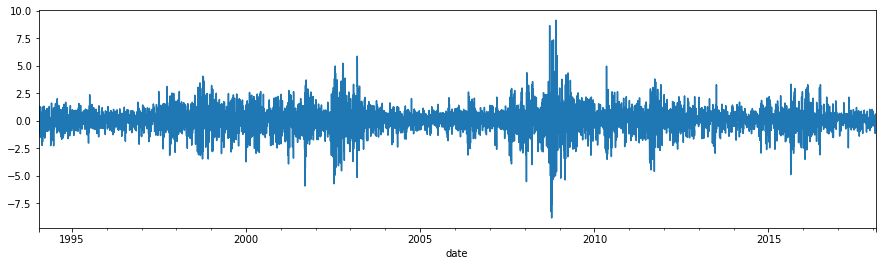

In [35]:
newdf['ftseResiduals'].plot(figsize=(15,4))

In [36]:
#This is stantionary
sts.adfuller(newdf['ftseResiduals'])

(-14.984728014497765,
 1.1483090717890715e-27,
 34,
 6235,
 {'1%': -3.4313992372517417,
  '5%': -2.862003669623052,
  '10%': -2.5670168084236167},
 19010.137269252024)

In [37]:
#This is stantionary, close enough to 0
sts.adfuller(df['ftse'])

(-1.5870996932038615,
 0.4900704664019161,
 6,
 6269,
 {'1%': -3.4313935443677157,
  '5%': -2.8620011543157835,
  '10%': -2.5670154694652805},
 68466.8899210519)